# TimeSeries - Rolling functions

In [1]:
import pandas as pd
import numpy as np

df = pd.read_pickle("stocks.pkl")
aal = df.xs("AAL").copy()
aal

open   high    low  close    volume
date                                            
2013-02-08  15.07  15.12  14.63  14.75   8407500
2013-02-11  14.89  15.01  14.26  14.46   8882000
2013-02-12  14.45  14.51  14.10  14.27   8126000
2013-02-13  14.30  14.94  14.25  14.66  10259500
2013-02-14  14.94  14.96  13.16  13.99  31879900
...           ...    ...    ...    ...       ...
2018-02-01  54.00  54.64  53.59  53.88   3623078
2018-02-02  53.49  53.99  52.03  52.10   5109361
2018-02-05  51.99  52.39  49.75  49.76   6878284
2018-02-06  49.32  51.50  48.79  51.18   6782480
2018-02-07  50.91  51.98  50.89  51.40   4845831

[1259 rows x 5 columns]

Lets say we want to looking at a rolling window over the course of a 5 open days, looking at the closing values of the security.

## Rolling

In [4]:
aal["RollingMean"] = aal.close.rolling(window=5).mean()
aal

open   high    low  close    volume  RollingMean
date                                                         
2013-02-08  15.07  15.12  14.63  14.75   8407500          NaN
2013-02-11  14.89  15.01  14.26  14.46   8882000          NaN
2013-02-12  14.45  14.51  14.10  14.27   8126000          NaN
2013-02-13  14.30  14.94  14.25  14.66  10259500          NaN
2013-02-14  14.94  14.96  13.16  13.99  31879900       14.426
...           ...    ...    ...    ...       ...          ...
2018-02-01  54.00  54.64  53.59  53.88   3623078       53.308
2018-02-02  53.49  53.99  52.03  52.10   5109361       53.114
2018-02-05  51.99  52.39  49.75  49.76   6878284       52.530
2018-02-06  49.32  51.50  48.79  51.18   6782480       52.248
2018-02-07  50.91  51.98  50.89  51.40   4845831       51.664

[1259 rows x 6 columns]

In [5]:
aal["RollingCenterMean"] = aal.close.rolling(window=5, center=True).mean()
aal

open   high    low  close    volume  RollingMean  \
date                                                            
2013-02-08  15.07  15.12  14.63  14.75   8407500          NaN   
2013-02-11  14.89  15.01  14.26  14.46   8882000          NaN   
2013-02-12  14.45  14.51  14.10  14.27   8126000          NaN   
2013-02-13  14.30  14.94  14.25  14.66  10259500          NaN   
2013-02-14  14.94  14.96  13.16  13.99  31879900       14.426   
...           ...    ...    ...    ...       ...          ...   
2018-02-01  54.00  54.64  53.59  53.88   3623078       53.308   
2018-02-02  53.49  53.99  52.03  52.10   5109361       53.114   
2018-02-05  51.99  52.39  49.75  49.76   6878284       52.530   
2018-02-06  49.32  51.50  48.79  51.18   6782480       52.248   
2018-02-07  50.91  51.98  50.89  51.40   4845831       51.664   

            RollingCenterMean  
date                           
2013-02-08                NaN  
2013-02-11                NaN  
2013-02-12             14.426  
2013-02-13             14.376  
2013-02-14             14.336  
...                       ...  
2018-02-01             52.530  
2018-02-02             52.248  
2018-02-05             51.664  
2018-02-06                NaN  
2018-02-07                NaN  

[1259 rows x 7 columns]

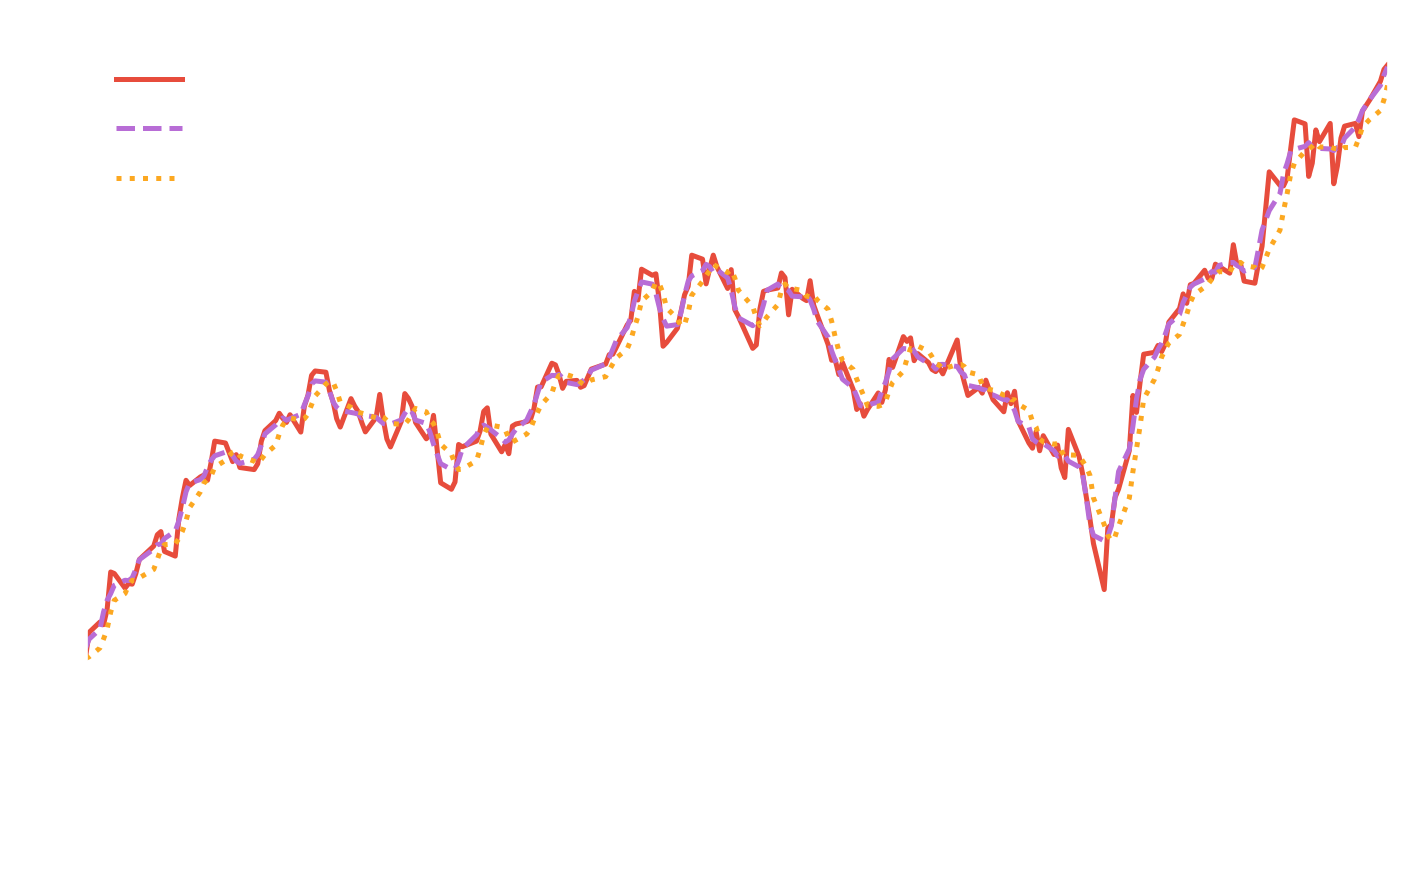

In [8]:
aal["2014"].reset_index().plot(x="date", y=["close", "RollingCenterMean", "RollingMean"]);

In [9]:
new_index = pd.date_range(aal.index.min(), aal.index.max(), name="date")
aal2 = aal.reindex(new_index, method="ffill")
aal2["2014"].reset_index().plot(x="date", y=["close", "RollingCenterMean", "RollingMean"]);

## Window Functions

When we take the mean of 5 points, we normally give them the same weight. However, we dont have to. Doing something like Gaussian smoothing, we would roll with a filter that isn't uniform (tophat / boxcar), we would use a Gaussian filter. You can see the list of filters here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

And rolling returns a window object, which we called mean on before. But you can see more about the object here: https://pandas.pydata.org/pandas-docs/stable/reference/window.html

The window objects for specific filters are implemented in scipy:
https://docs.scipy.org/doc/scipy/reference/signal.windows.html


Rolling has a generic `apply` for custom functions, but specifying a window may not allow this. For example, we cannot choose a Gaussian window and use apply.

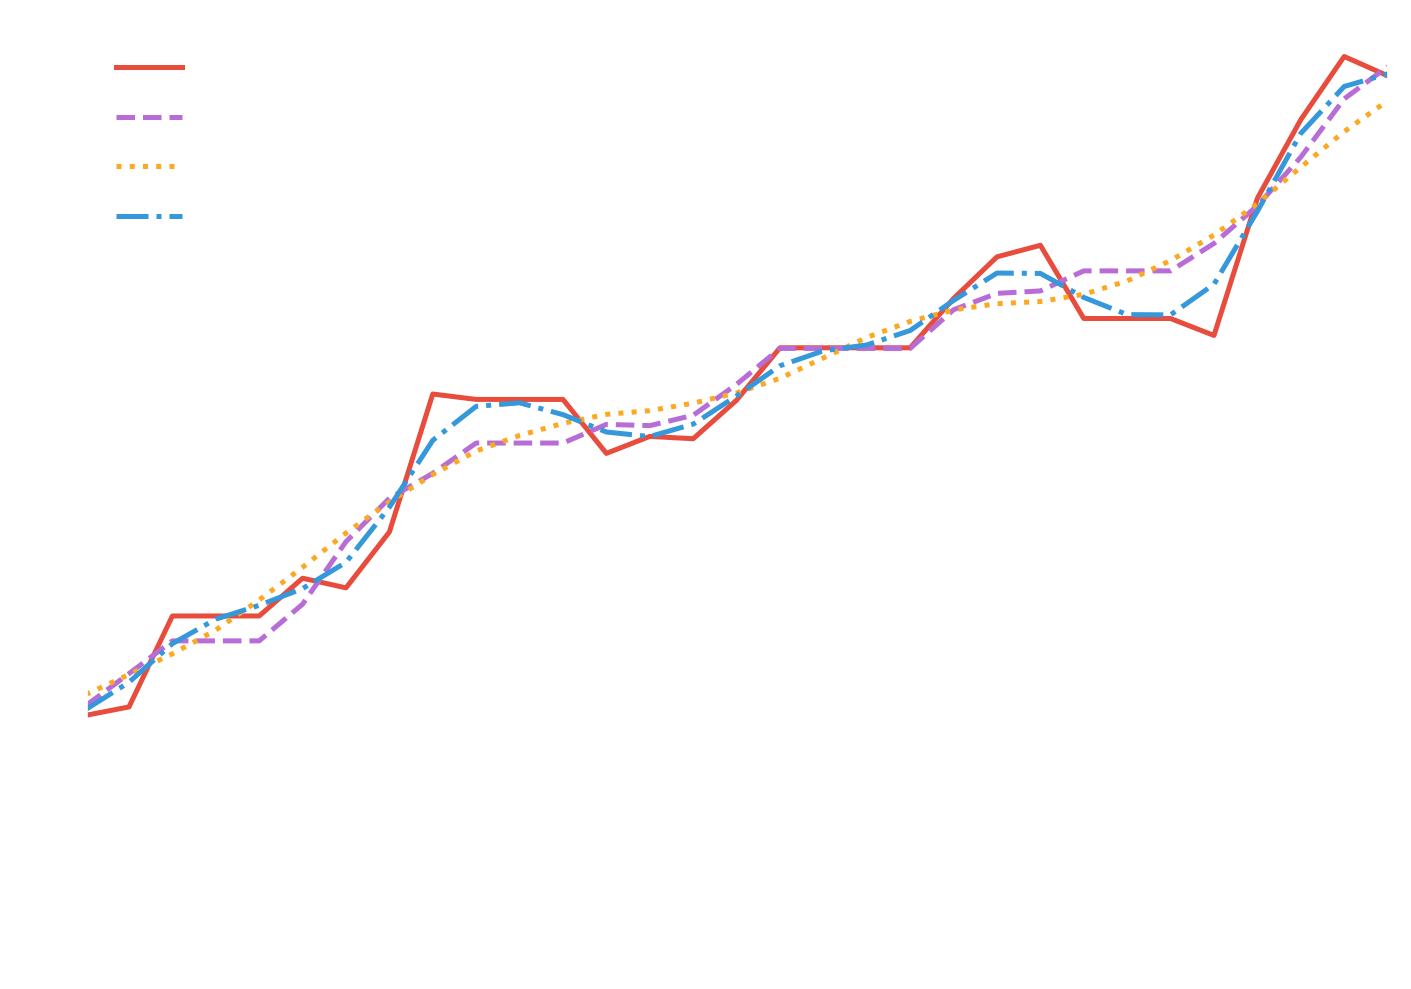

In [14]:
aal2["Gauss3"] = aal2.close.rolling(window=9, win_type="gaussian", center=True).mean(std=3)
aal2["Gauss1"] = aal2.close.rolling(window=9, win_type="gaussian", center=True).mean(std=1)

ax = aal2["2014-01"].reset_index().plot(x="date", y="close", label="Close");
aal2["2014-01"].reset_index().plot(x="date", y="RollingCenterMean", ax=ax, label="RollingCenter");
aal2["2014-01"].reset_index().plot(x="date", y="Gauss3", ax=ax, label="Gauss3");
aal2["2014-01"].reset_index().plot(x="date", y="Gauss1", ax=ax, label="Gauss1");

In [16]:
# std?
from scipy.signal.windows import gaussian
import matplotlib.pyplot as plt
xs = np.arange(9)
plt.plot(xs, gaussian(9, std=1), label="Std 1")
plt.plot(xs, gaussian(9, std=2), label="Std 2")
plt.plot(xs, gaussian(9, std=3), label="Std 3")
plt.legend();

You can duplicate any window or effect you want if you dont specify a filter and pick `apply`, because you can do anything you want, including determining the weight of the data points.


### Recap
* rolling
* window function doesn't have to be uniform
* alignment
* Functions you can apply are different to groupby